In [666]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [667]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [668]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

###Checking data in the dataset

In [669]:
train_df.shape

(1460, 81)

In [670]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###There are numerical and categorical values.

###Checking dtypes and missing values

In [671]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [672]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


###train_df.describe() showing only the numerical values

###Now we divide categorical and numerical values

In [673]:
categorical = train_df.select_dtypes(exclude=['number','float_','bool'])

In [674]:
categorical_test = test_df.select_dtypes(exclude=['number','float_','bool'])

In [675]:
categorical.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [676]:
categorical_test.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


###Checking for missing values

In [677]:
categorical_test.isnull().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [678]:
categorical.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

Though Alley contains many Nan values. It's a feature which says it doesn't contain alley.

In [679]:
#categorical['Alley'] = categorical['Alley'].fillna('No_Alley')

In [680]:
categorical.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

In [681]:
categorical_test.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

In [682]:
categorical.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [683]:
categorical_test.isnull().sum()

MSZoning          4
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       1
Functional        2
GarageType       76
GarageFinish     78
GarageQual       78
GarageCond       78
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64

###Allows us to see the distribution of data across all columns in the whole dataset. It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.

<Axes: >

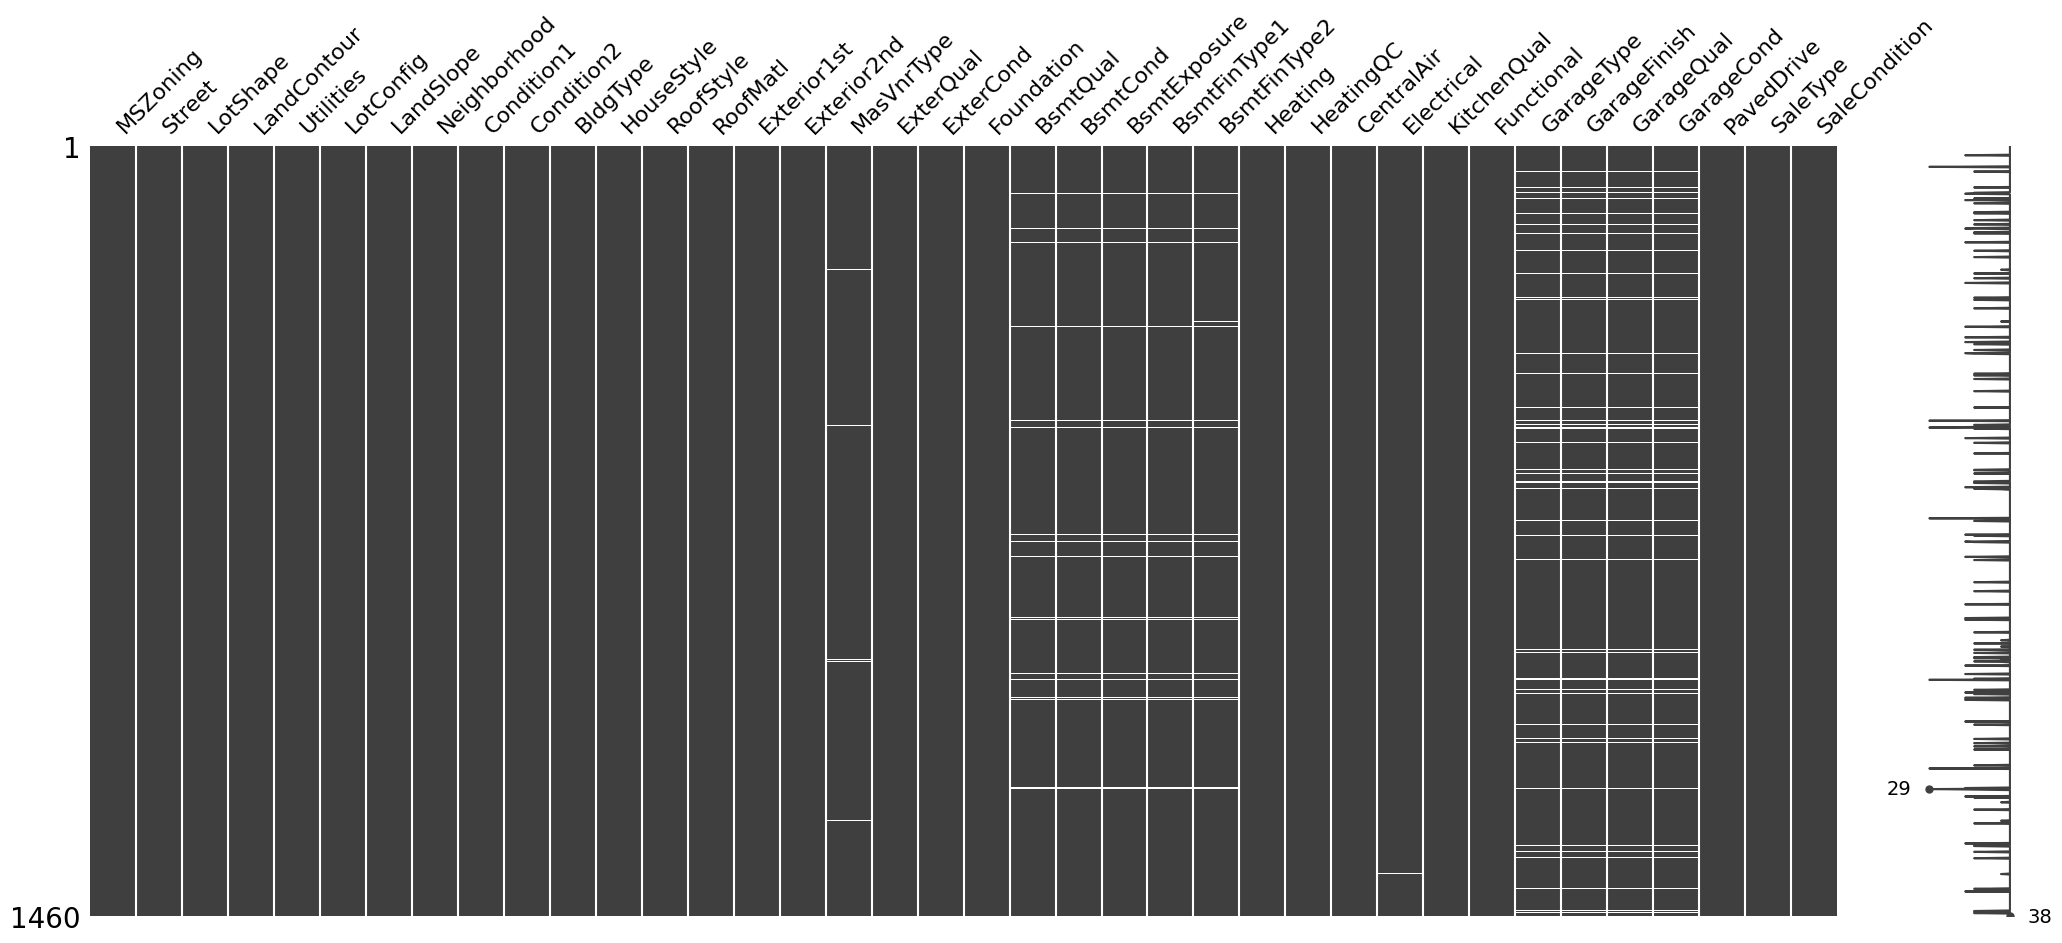

In [684]:
msno.matrix(categorical)

The sparkline (or in some cases striped line) to the right illustrates the overall shape of the data completeness and highlights the rows in the dataset with the highest of 38 and lowest nullity of 29

###The dendrogram like heatmap groups columns based on nullity relation between them, revealing trends deeper than in the correlation heatmap. It groups columns where there is more nullity relation.

<Axes: >

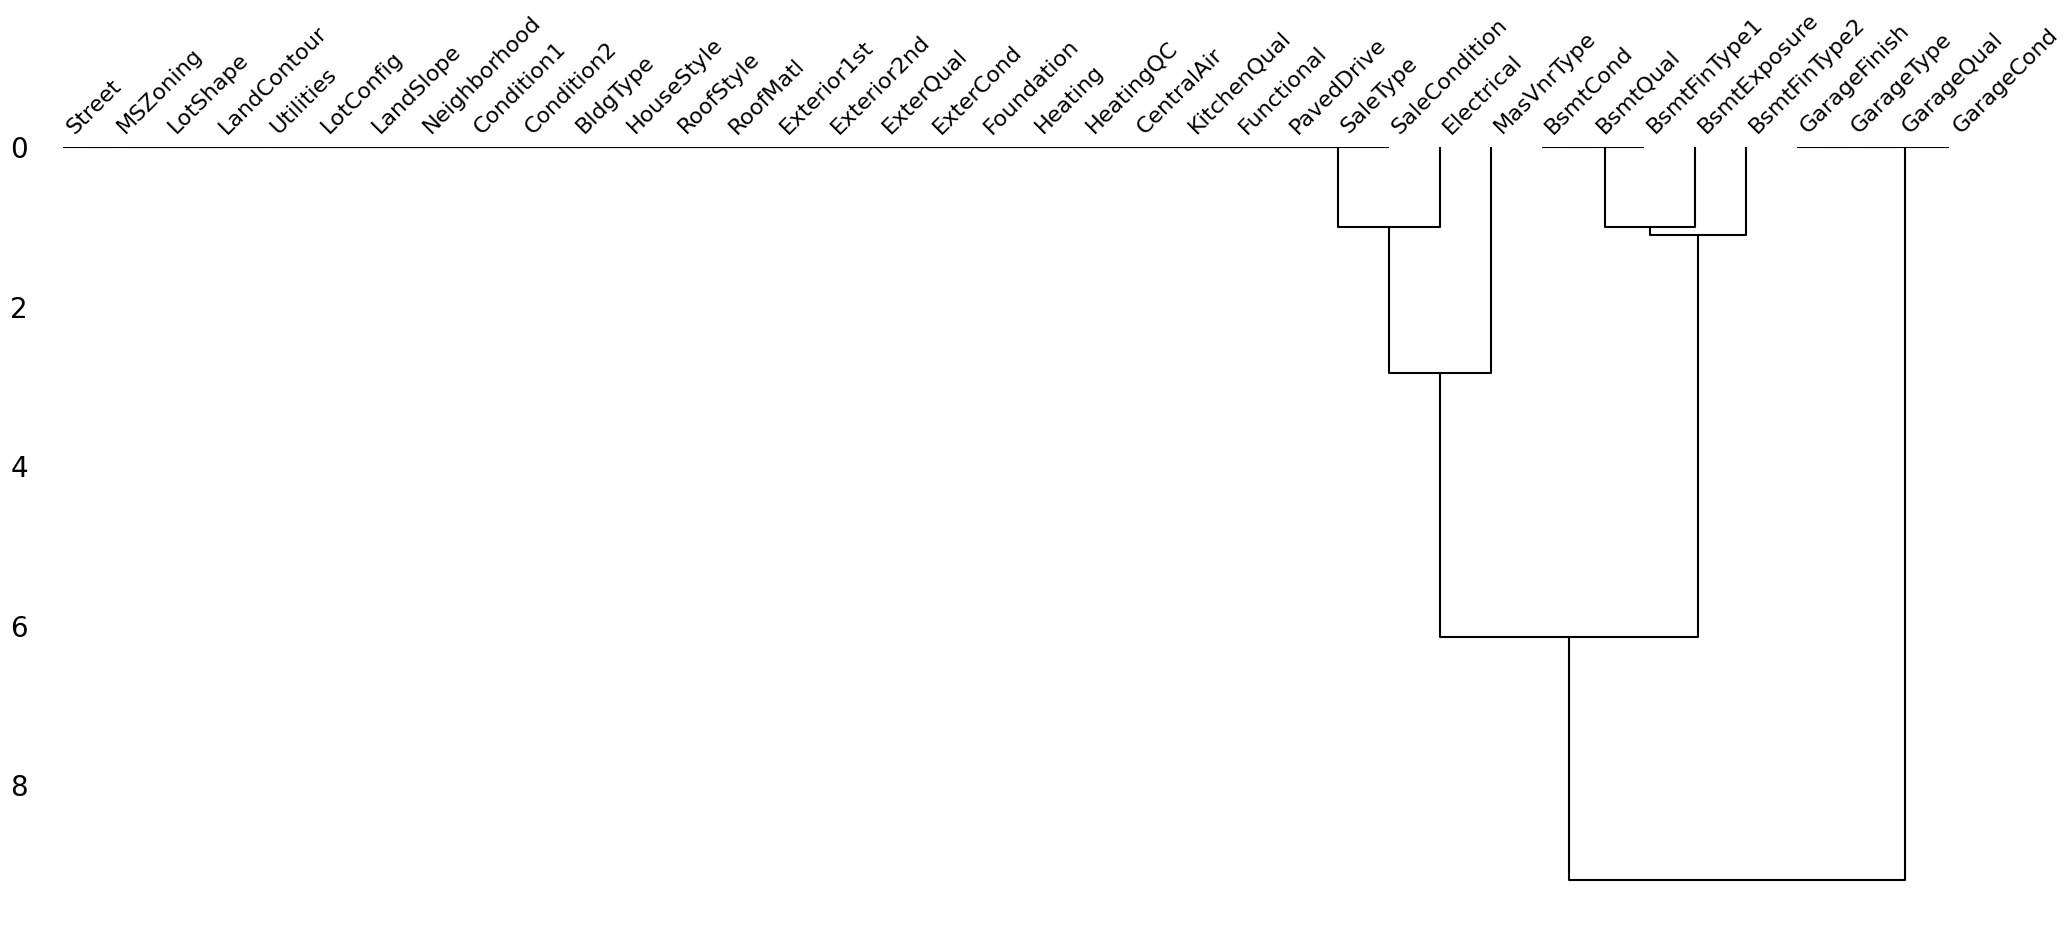

In [685]:
msno.dendrogram(categorical)

###Adding the *SalePrice* column here to see the correlation

In [686]:
categorical['SalePrice']=train_df.SalePrice

In [687]:
categorical.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000


###Checking the unique values for the columns which will be taken after removing the unrelated cols. Goal is to check if there exists values with spelling mistakes or Typos.

##Also filling the NaN values

##*Check for related columns and fill the missing values according to the heavily related column*

In [688]:
categorical.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [689]:
categorical.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [690]:
categorical.BsmtQual.isnull().sum()

37

In [691]:
# Calculate the most frequent value (mode) in the column
most_frequent_value=categorical['BsmtQual'].mode().iloc[0]

# Fill missing string values with the most frequent value
categorical['BsmtQual'] = categorical['BsmtQual'].fillna(most_frequent_value)

In [692]:
categorical.BsmtQual.isnull().sum()

0

In [693]:
categorical.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [694]:
categorical.BsmtExposure.isnull().sum()

38

In [695]:
# Calculate the most frequent value (mode) in the column
most_frequent_value=categorical['BsmtExposure'].mode().iloc[0]

# Fill missing string values with the most frequent value
categorical['BsmtExposure'] = categorical['BsmtExposure'].fillna(most_frequent_value)

In [696]:
categorical.BsmtExposure.isnull().sum()

0

In [697]:
categorical.HeatingQC.unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [698]:
categorical.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [699]:
categorical.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [700]:
# Calculate the most frequent value (mode) in the column
most_frequent_value=categorical['GarageType'].mode().iloc[0]

# Fill missing string values with the most frequent value
categorical['GarageType'] = categorical['GarageType'].fillna(most_frequent_value)

In [701]:
categorical.GarageType.isnull().sum()

0

In [702]:
categorical.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [703]:
# Calculate the most frequent value (mode) in the column
most_frequent_value=categorical['GarageFinish'].mode().iloc[0]

# Fill missing string values with the most frequent value
categorical['GarageFinish'] = categorical['GarageFinish'].fillna(most_frequent_value)

In [704]:
categorical.GarageFinish.isnull().sum()

0

In [705]:
categorical.GarageFinish.isnull().sum()

0

In [706]:
categorical_test.GarageFinish.unique()

array(['Unf', 'Fin', 'RFn', nan], dtype=object)

###Fucntion for filling Missing Values with *Mode*

In [707]:
categorical_test.isnull().sum()

MSZoning          4
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       1
Functional        2
GarageType       76
GarageFinish     78
GarageQual       78
GarageCond       78
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64

In [708]:
def fill_null_values(df):
  for col in df.columns:
        mode_val = df[col].mode().iloc[0]  # Compute the mode (most frequent value) of the column
        df[col].fillna(mode_val, inplace=True)  # Fill NaN values with the mode
  return df

In [709]:
fill_null_values(categorical_test)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [710]:
categorical_test.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

###Encoding the categorical values into numeric values

In [711]:
categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [712]:
categorical[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']] = categorical[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']].apply(LabelEncoder().fit_transform)

In [713]:
categorical_test.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [714]:
categorical_test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']] = categorical_test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']].apply(LabelEncoder().fit_transform)

In [715]:
categorical.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,2,6,1,1,4,4,2,8,4,208500
1,3,1,3,3,0,2,0,24,1,2,...,3,6,1,1,4,4,2,8,4,181500
2,3,1,0,3,0,4,0,5,2,2,...,2,6,1,1,4,4,2,8,4,223500
3,3,1,0,3,0,0,0,6,2,2,...,2,6,5,2,4,4,2,8,0,140000
4,3,1,0,3,0,2,0,15,2,2,...,2,6,1,1,4,4,2,8,4,250000


In [716]:
categorical_test.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,3,3,6,1,2,3,4,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,3,2,6,1,2,3,4,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,3,3,6,1,0,3,4,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,3,2,6,1,0,3,4,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,3,2,6,1,1,3,4,2,8,4


###Finding the correlation between *SalePrice* and other categorical features.

In [717]:
corr = categorical.corr(method = 'pearson')
corr['SalePrice']

MSZoning        -0.166872
Street           0.041036
LotShape        -0.255580
LandContour      0.015453
Utilities       -0.014314
LotConfig       -0.067396
LandSlope        0.051152
Neighborhood     0.210851
Condition1       0.091155
Condition2       0.007513
BldgType        -0.085591
HouseStyle       0.180163
RoofStyle        0.222405
RoofMatl         0.132383
Exterior1st      0.103551
Exterior2nd      0.103766
MasVnrType       0.029658
ExterQual       -0.636884
ExterCond        0.117303
Foundation       0.382479
BsmtQual        -0.618025
BsmtCond         0.015058
BsmtExposure    -0.295407
BsmtFinType1    -0.103114
BsmtFinType2     0.008041
Heating         -0.098812
HeatingQC       -0.400178
CentralAir       0.251328
Electrical       0.234716
KitchenQual     -0.589189
Functional       0.115328
GarageType      -0.302105
GarageFinish    -0.537242
GarageQual       0.006861
GarageCond       0.025149
PavedDrive       0.231357
SaleType        -0.054911
SaleCondition    0.213092
SalePrice   

###Dropping columns that are not related to the target column *SalePrice*


In [718]:
categorical.drop(columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
      'Exterior2nd', 'MasVnrType','ExterCond', 'Foundation','Heating','BsmtFinType1', 'BsmtFinType2','BsmtCond','CentralAir','Electrical','Functional','GarageQual',
                         'GarageCond','PavedDrive','SaleType','SaleCondition'],axis=1,inplace=True)

In [719]:
categorical_test.drop(columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
      'Exterior2nd', 'MasVnrType','ExterCond', 'Foundation','Heating','BsmtFinType1', 'BsmtFinType2','BsmtCond','CentralAir','Electrical','Functional','GarageQual',
                         'GarageCond','PavedDrive','SaleType','SaleCondition'],axis=1,inplace=True)

In [720]:
categorical.head(5)

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,SalePrice
0,2,2,3,0,2,1,1,208500
1,3,2,1,0,3,1,1,181500
2,2,2,2,0,2,1,1,223500
3,3,3,3,2,2,5,2,140000
4,2,2,0,0,2,1,1,250000


In [721]:
categorical_test.head(5)

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish
0,3,3,3,4,3,1,2
1,3,3,3,4,2,1,2
2,3,2,3,2,3,1,0
3,3,3,3,0,2,1,0
4,2,2,3,0,2,1,1


In [722]:
categorical.describe()

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.539726,2.280137,2.284247,1.538356,2.339726,2.208219,1.228767,180921.195890
std,0.693995,0.864510,1.138472,1.739524,0.830161,1.759864,0.811835,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,1.000000,129975.000000
50%,3.000000,2.000000,3.000000,0.000000,3.000000,1.000000,1.000000,163000.000000
75%,3.000000,3.000000,3.000000,4.000000,3.000000,5.000000,2.000000,214000.000000
max,3.000000,3.000000,3.000000,4.000000,3.000000,5.000000,2.000000,755000.000000


In [723]:
corr = categorical.corr(method = 'pearson')
corr['SalePrice']

ExterQual      -0.636884
BsmtQual       -0.618025
BsmtExposure   -0.295407
HeatingQC      -0.400178
KitchenQual    -0.589189
GarageType     -0.302105
GarageFinish   -0.537242
SalePrice       1.000000
Name: SalePrice, dtype: float64

###Dropping the Target Column

In [724]:
categorical.drop(['SalePrice'],axis=1,inplace=True)

In [725]:
categorical.head(5)

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish
0,2,2,3,0,2,1,1
1,3,2,1,0,3,1,1
2,2,2,2,0,2,1,1
3,3,3,3,2,2,5,2
4,2,2,0,0,2,1,1


###Checking is null value exists

In [726]:
categorical.isnull().sum()

ExterQual       0
BsmtQual        0
BsmtExposure    0
HeatingQC       0
KitchenQual     0
GarageType      0
GarageFinish    0
dtype: int64

In [727]:
categorical_test.isnull().sum()

ExterQual       0
BsmtQual        0
BsmtExposure    0
HeatingQC       0
KitchenQual     0
GarageType      0
GarageFinish    0
dtype: int64

##Taking the numerical values

In [728]:
numerical = train_df.select_dtypes(exclude=['object'])

In [729]:
numerical_test = test_df.select_dtypes(exclude=['object'])

In [730]:
numerical.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [731]:
numerical_test.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [732]:
num_corr = numerical.corr(method = 'pearson')
num_corr['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [733]:
num_corr['SalePrice'][4]

0.7909816005838053

In [734]:
numerical.columns.size

38

In [735]:
numerical.columns[4]

'OverallQual'

In [736]:
num_corr.columns.size

38

#Function for removing unrelated columns

In [737]:
def remove_unrelated_cols(df,target_col):
  correlated_matrix = df.corr(method = 'pearson')
  for i in range((correlated_matrix.columns.size)-1):
    if(correlated_matrix[target_col][i]<0.1):
      print("Column Name: ",correlated_matrix.columns[i],"\t","Correlation Value: ",correlated_matrix[target_col][i])
      df.drop([correlated_matrix.columns[i]],axis=1,inplace=True)

In [738]:
remove_unrelated_cols(numerical,'SalePrice')

Column Name:  Id 	 Correlation Value:  -0.021916719443430967
Column Name:  MSSubClass 	 Correlation Value:  -0.08428413512659509
Column Name:  OverallCond 	 Correlation Value:  -0.07785589404867797
Column Name:  BsmtFinSF2 	 Correlation Value:  -0.011378121450215146
Column Name:  LowQualFinSF 	 Correlation Value:  -0.02560613000067955
Column Name:  BsmtHalfBath 	 Correlation Value:  -0.01684415429735895
Column Name:  KitchenAbvGr 	 Correlation Value:  -0.13590737084214105
Column Name:  EnclosedPorch 	 Correlation Value:  -0.1285779579259566
Column Name:  3SsnPorch 	 Correlation Value:  0.04458366533574838
Column Name:  PoolArea 	 Correlation Value:  0.09240354949187318
Column Name:  MiscVal 	 Correlation Value:  -0.021189579640303213
Column Name:  MoSold 	 Correlation Value:  0.046432245223819446
Column Name:  YrSold 	 Correlation Value:  -0.028922585168736813


In [739]:
numerical.head(5)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,3,8,0,2003.0,2,548,0,61,0,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,3,6,1,1976.0,2,460,298,0,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,3,6,1,2001.0,2,608,0,42,0,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,3,7,1,1998.0,3,642,0,35,0,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,4,9,1,2000.0,3,836,192,84,0,250000


###Removing columns that were removed in train df

In [740]:
numerical_test.drop(columns=['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],axis=1,inplace=True)

In [741]:
num_corr = numerical.corr(method = 'pearson')
num_corr['SalePrice']

LotFrontage     0.351799
LotArea         0.263843
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
BsmtFullBath    0.227122
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
ScreenPorch     0.111447
SalePrice       1.000000
Name: SalePrice, dtype: float64

###Checking for Null Value

In [742]:
numerical.isnull().sum()

LotFrontage     259
LotArea           0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
ScreenPorch       0
SalePrice         0
dtype: int64

###Dealing with the Null Values

In [743]:
numerical.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [744]:
# Calculate the most frequent value (mode) in the column
most_frequent_value=numerical['GarageYrBlt'].mode().iloc[0]

# Fill missing string values with the most frequent value
numerical['GarageYrBlt'] = numerical['GarageYrBlt'].fillna(most_frequent_value)

In [745]:
numerical.GarageYrBlt.isnull().sum()

0

In [746]:
# Calculate the most frequent value (mode) in the column
most_frequent_value=numerical['MasVnrArea'].mode().iloc[0]

# Fill missing string values with the most frequent value
numerical['MasVnrArea'] = numerical['MasVnrArea'].fillna(most_frequent_value)

In [747]:
# Calculate the most frequent value (mode) in the column
most_frequent_value=numerical['LotFrontage'].mode().iloc[0]

# Fill missing string values with the most frequent value
numerical['LotFrontage'] = numerical['LotFrontage'].fillna(most_frequent_value)

In [748]:
numerical_test.isnull().sum()

LotFrontage     227
LotArea           0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
BsmtFinSF1        1
BsmtUnfSF         1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      78
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
ScreenPorch       0
dtype: int64

In [749]:
fill_null_values(numerical_test)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch
0,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,...,0,2,5,0,1961.0,1.0,730.0,140,0,120
1,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,...,1,3,6,0,1958.0,1.0,312.0,393,36,0
2,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,...,1,3,6,1,1997.0,2.0,482.0,212,34,0
3,78.0,9978,6,1998,1998,20.0,602.0,324.0,926.0,926,...,1,3,7,1,1998.0,2.0,470.0,360,36,0
4,43.0,5005,8,1992,1992,0.0,263.0,1017.0,1280.0,1280,...,0,2,5,0,1992.0,2.0,506.0,0,82,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,1970,1970,0.0,0.0,546.0,546.0,546,...,1,3,5,0,2005.0,0.0,0.0,0,0,0
1455,21.0,1894,4,1970,1970,0.0,252.0,294.0,546.0,546,...,1,3,6,0,1970.0,1.0,286.0,0,24,0
1456,160.0,20000,5,1960,1996,0.0,1224.0,0.0,1224.0,1224,...,0,4,7,1,1960.0,2.0,576.0,474,0,0
1457,62.0,10441,5,1992,1992,0.0,337.0,575.0,912.0,970,...,0,3,6,0,2005.0,0.0,0.0,80,32,0


In [750]:
numerical_test.isnull().sum()

LotFrontage     0
LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
ScreenPorch     0
dtype: int64

##Concat Categorical & Numerical Values

In [751]:
df = pd.concat([categorical, numerical], axis="columns")
#df=numerical

In [752]:
df_pred = pd.concat([categorical_test, numerical_test], axis="columns")

In [753]:
df.head(5)

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,LotFrontage,LotArea,OverallQual,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,2,2,3,0,2,1,1,65.0,8450,7,...,3,8,0,2003.0,2,548,0,61,0,208500
1,3,2,1,0,3,1,1,80.0,9600,6,...,3,6,1,1976.0,2,460,298,0,0,181500
2,2,2,2,0,2,1,1,68.0,11250,7,...,3,6,1,2001.0,2,608,0,42,0,223500
3,3,3,3,2,2,5,2,60.0,9550,7,...,3,7,1,1998.0,3,642,0,35,0,140000
4,2,2,0,0,2,1,1,84.0,14260,8,...,4,9,1,2000.0,3,836,192,84,0,250000


In [754]:
df_pred.head(5)

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,LotFrontage,LotArea,OverallQual,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch
0,3,3,3,4,3,1,2,80.0,11622,5,...,0,2,5,0,1961.0,1.0,730.0,140,0,120
1,3,3,3,4,2,1,2,81.0,14267,6,...,1,3,6,0,1958.0,1.0,312.0,393,36,0
2,3,2,3,2,3,1,0,74.0,13830,5,...,1,3,6,1,1997.0,2.0,482.0,212,34,0
3,3,3,3,0,2,1,0,78.0,9978,6,...,1,3,7,1,1998.0,2.0,470.0,360,36,0
4,2,2,3,0,2,1,1,43.0,5005,8,...,0,2,5,0,1992.0,2.0,506.0,0,82,144


In [755]:
df_corr = df.corr(method = 'pearson')
df_corr

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,LotFrontage,LotArea,OverallQual,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
ExterQual,1.000000,0.587482,0.222958,0.432499,0.641584,0.224433,0.455870,-0.188654,-0.057275,-0.634319,...,0.042671,-0.289246,-0.222221,-0.472151,-0.449980,-0.443532,-0.181448,-0.268031,-0.014720,-0.636884
BsmtQual,0.587482,1.000000,0.281859,0.383216,0.509075,0.230133,0.468205,-0.177784,-0.065150,-0.600561,...,0.091964,-0.236951,-0.203808,-0.473206,-0.485627,-0.447944,-0.230416,-0.240541,-0.003269,-0.618025
BsmtExposure,0.222958,0.281859,1.000000,0.123064,0.203792,0.199299,0.231417,-0.117784,-0.141043,-0.244304,...,0.119132,-0.008478,-0.110571,-0.235589,-0.229882,-0.230905,-0.210448,-0.057200,-0.007356,-0.295407
HeatingQC,0.432499,0.383216,0.123064,1.000000,0.388233,0.165755,0.379143,-0.089337,0.004212,-0.425944,...,0.047324,-0.159022,-0.122745,-0.377722,-0.302616,-0.258249,-0.107107,-0.174535,0.055806,-0.400178
KitchenQual,0.641584,0.509075,0.203792,0.388233,1.000000,0.179082,0.375808,-0.197410,-0.057018,-0.555348,...,0.037696,-0.263543,-0.228035,-0.359380,-0.365124,-0.364862,-0.160471,-0.222063,-0.026612,-0.589189
GarageType,0.224433,0.230133,0.199299,0.165755,0.179082,1.000000,0.421422,-0.201787,-0.116799,-0.297995,...,-0.017376,-0.088995,-0.220119,-0.384459,-0.116844,-0.102921,-0.191518,-0.121999,-0.024647,-0.302105
GarageFinish,0.455870,0.468205,0.231417,0.379143,0.375808,0.421422,1.000000,-0.200459,-0.116326,-0.538529,...,0.010980,-0.240464,-0.304807,-0.439226,-0.475862,-0.416669,-0.246785,-0.211849,-0.026700,-0.537242
LotFrontage,-0.188654,-0.177784,-0.117784,-0.089337,-0.197410,-0.201787,-0.200459,1.000000,0.281283,0.236891,...,0.232143,0.319389,0.208721,0.040960,0.264353,0.317925,0.061329,0.131468,0.036907,0.329220
LotArea,-0.057275,-0.065150,-0.141043,0.004212,-0.057018,-0.116799,-0.116326,0.281283,1.000000,0.105806,...,0.119690,0.190015,0.271364,-0.042198,0.154871,0.180403,0.171698,0.084774,0.043160,0.263843
OverallQual,-0.634319,-0.600561,-0.244304,-0.425944,-0.555348,-0.297995,-0.538529,0.236891,0.105806,1.000000,...,0.101676,0.427452,0.396765,0.437998,0.600671,0.562022,0.238923,0.308819,0.064886,0.790982


###Checking Correlation between features themselves so that highly correlated features can be excluded

In [756]:
corr_features_df = df.corr().abs()
correlated_df = (corr_features_df.where(np.triu(np.ones(corr_features_df.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

<ipython-input-756-fd1d857e2191>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correlated_df = (corr_features_df.where(np.triu(np.ones(corr_features_df.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))


In [757]:
correlated_df.head(10)

GarageCars    GarageArea      0.882475
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
YearBuilt     GarageYrBlt     0.700098
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
ExterQual     KitchenQual     0.641584
dtype: float64

In [758]:
df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

###Scaling the data
Removing the target column so that it doesn't get scaled.

In [759]:
y=df['SalePrice']
y.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [760]:
df.drop('SalePrice',axis=1,inplace=True)
df.head(5)

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,LotFrontage,LotArea,OverallQual,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch
0,2,2,3,0,2,1,1,65.0,8450,7,...,1,3,8,0,2003.0,2,548,0,61,0
1,3,2,1,0,3,1,1,80.0,9600,6,...,0,3,6,1,1976.0,2,460,298,0,0
2,2,2,2,0,2,1,1,68.0,11250,7,...,1,3,6,1,2001.0,2,608,0,42,0
3,3,3,3,2,2,5,2,60.0,9550,7,...,0,3,7,1,1998.0,3,642,0,35,0
4,2,2,0,0,2,1,1,84.0,14260,8,...,1,4,9,1,2000.0,3,836,192,84,0


array([[<Axes: title={'center': 'ExterQual'}>,
        <Axes: title={'center': 'BsmtQual'}>,
        <Axes: title={'center': 'BsmtExposure'}>,
        <Axes: title={'center': 'HeatingQC'}>,
        <Axes: title={'center': 'KitchenQual'}>,
        <Axes: title={'center': 'GarageType'}>],
       [<Axes: title={'center': 'GarageFinish'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBa

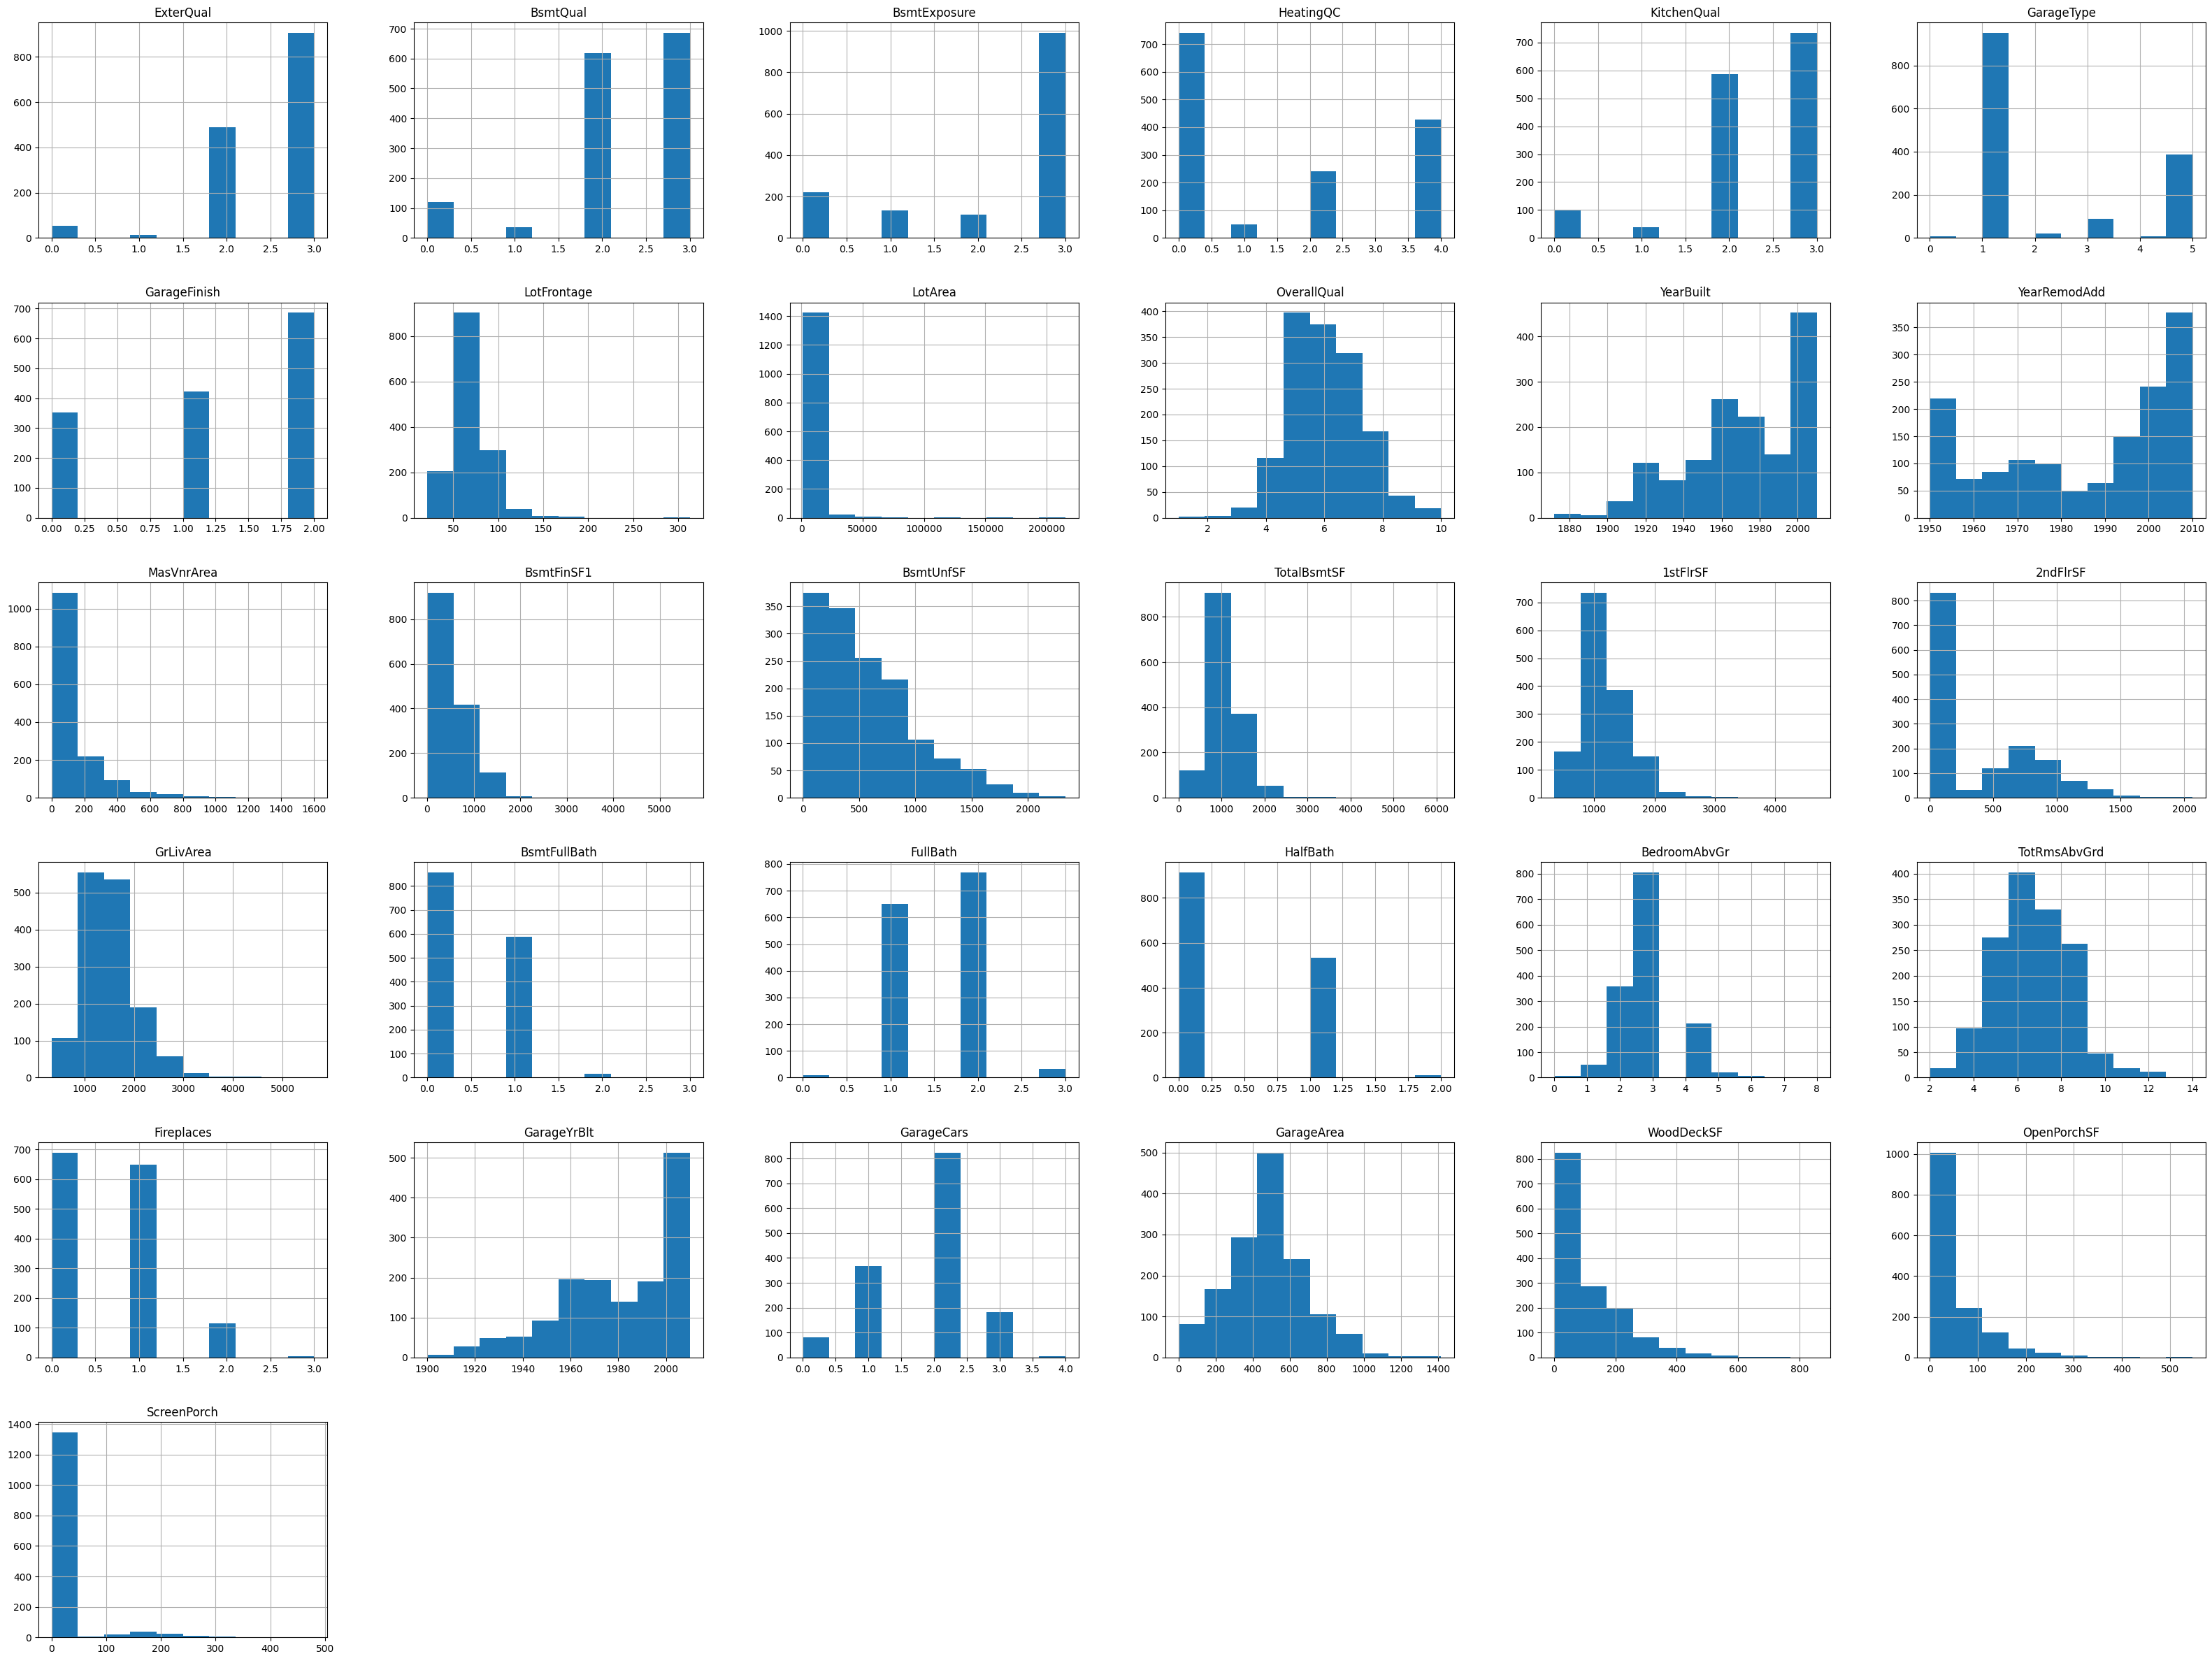

In [761]:
df.hist(figsize=(40,30))

In [762]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

###Scaling test data

In [763]:
scaler = StandardScaler()
scaled_df_test = scaler.fit_transform(df_pred)

###Adding column names

array([[<Axes: title={'center': 'ExterQual'}>,
        <Axes: title={'center': 'BsmtQual'}>,
        <Axes: title={'center': 'BsmtExposure'}>,
        <Axes: title={'center': 'HeatingQC'}>,
        <Axes: title={'center': 'KitchenQual'}>,
        <Axes: title={'center': 'GarageType'}>],
       [<Axes: title={'center': 'GarageFinish'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBa

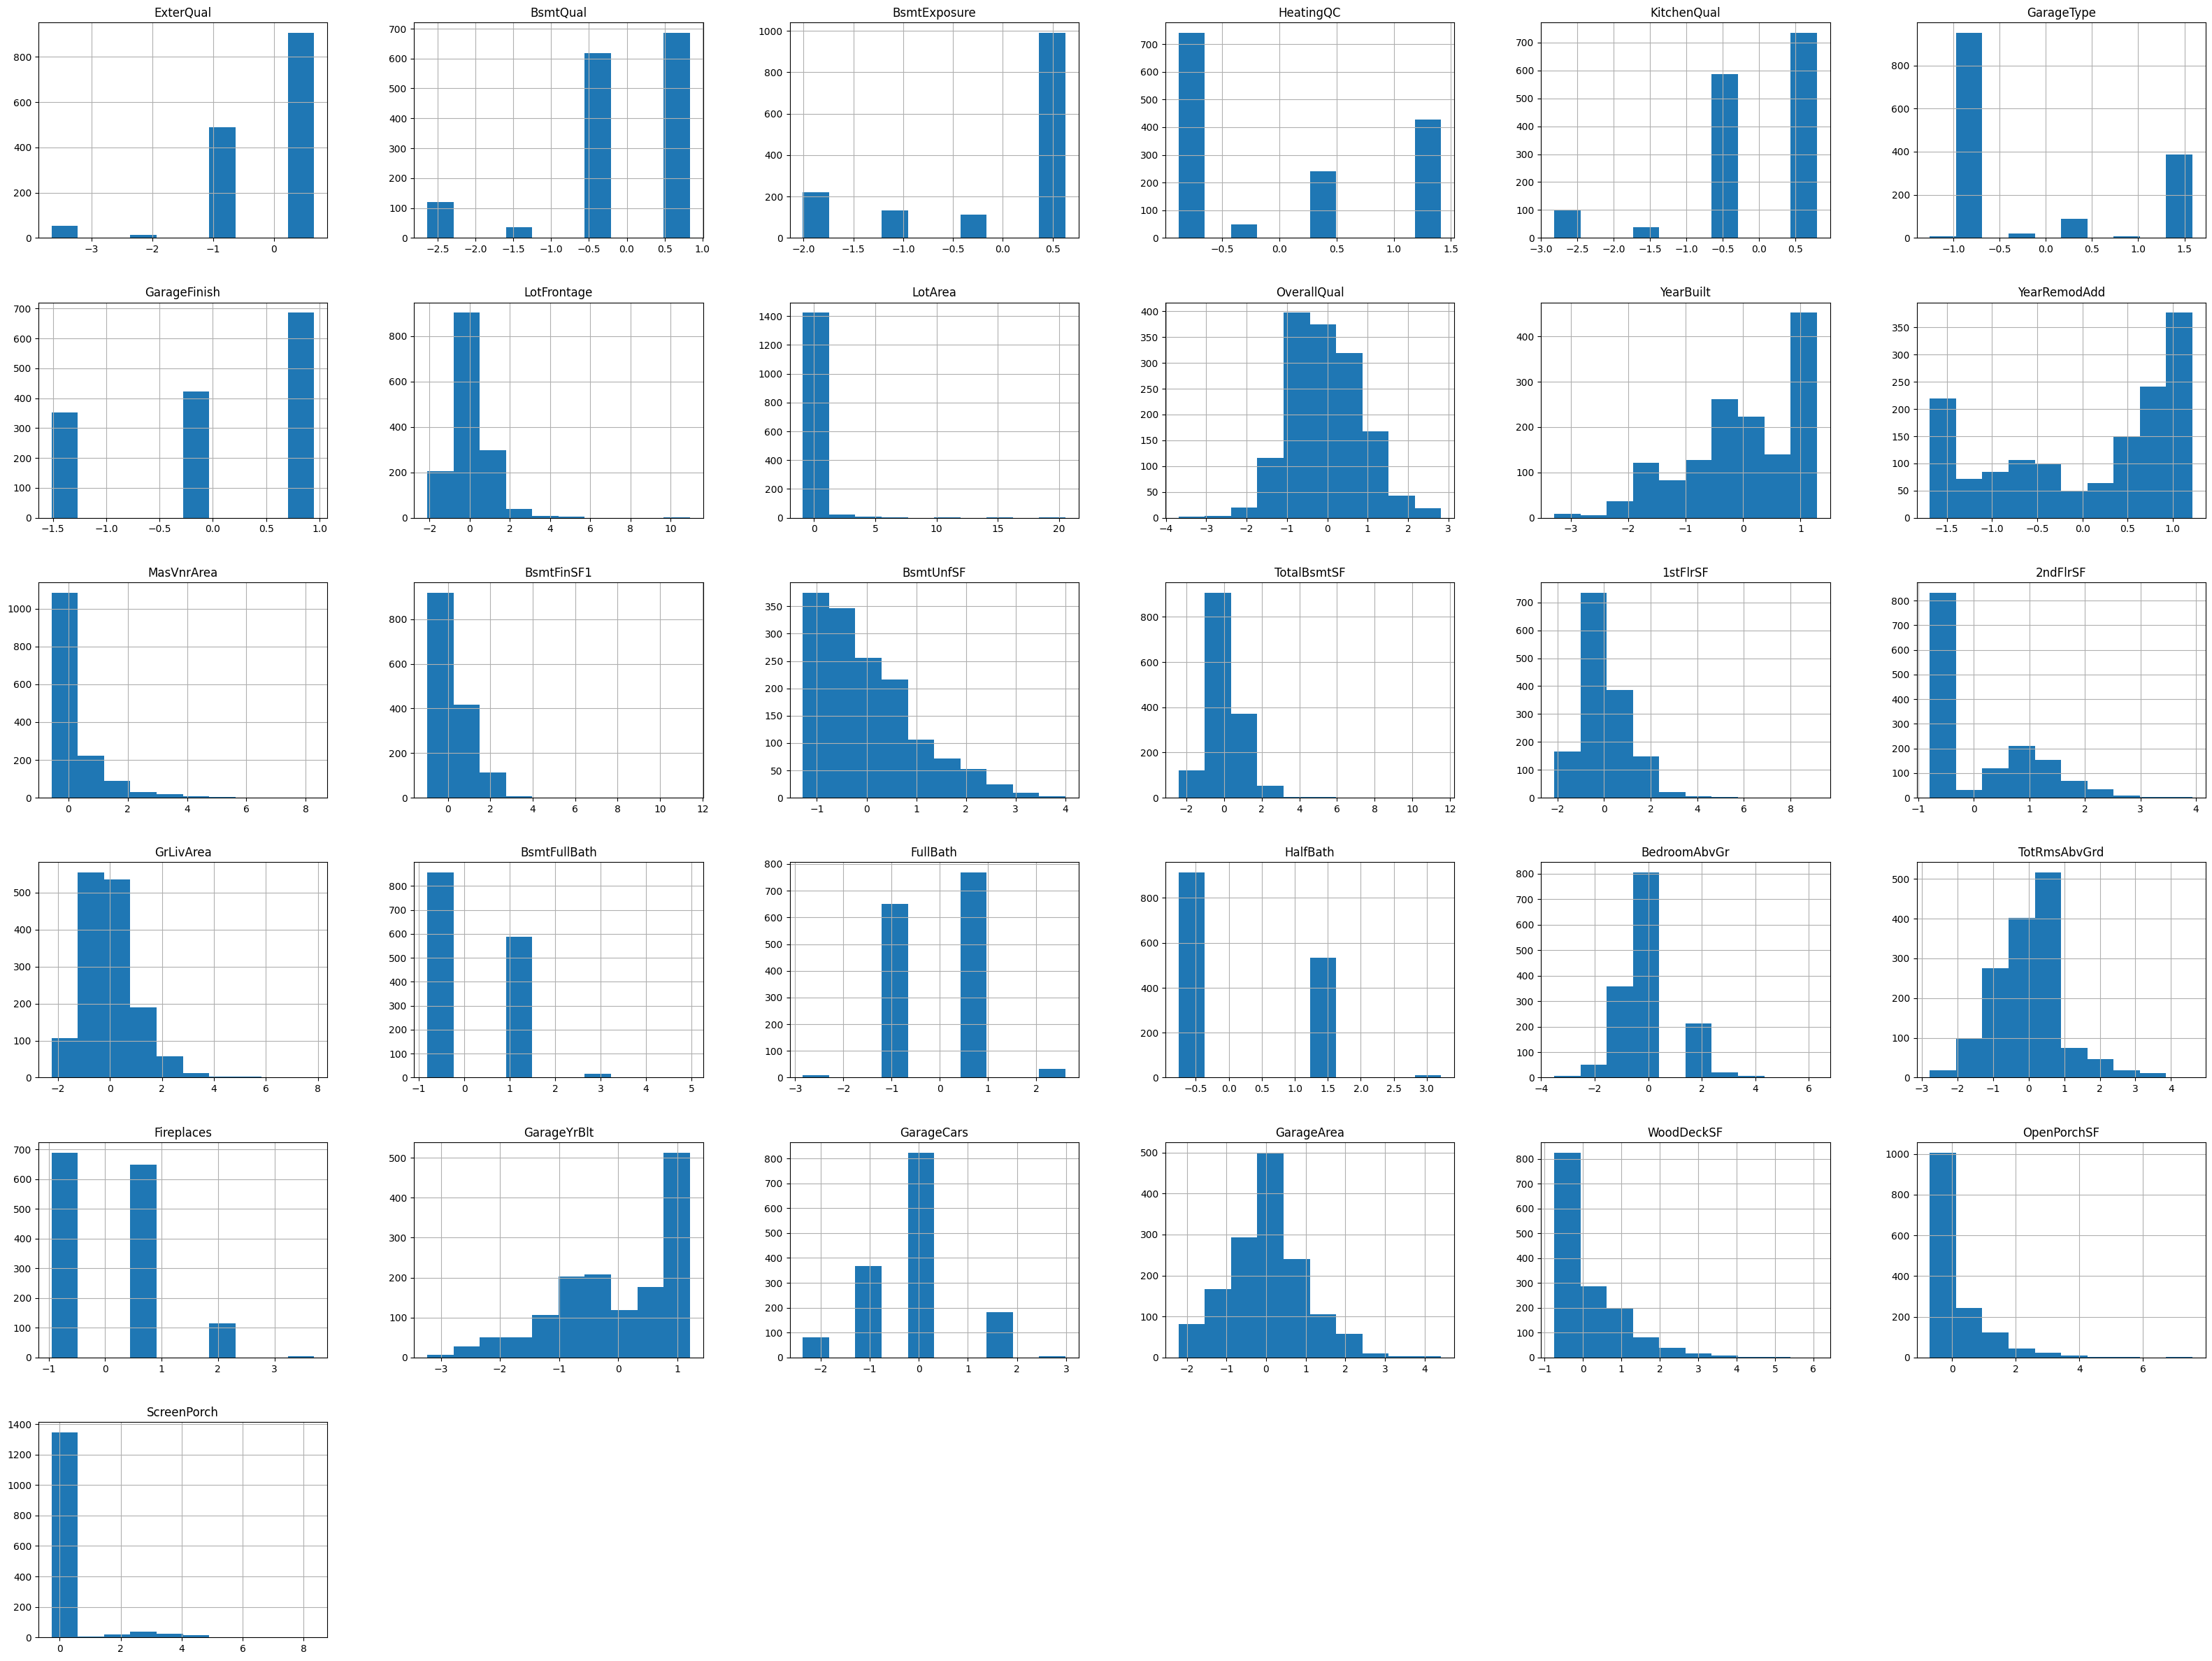

In [764]:
X = pd.DataFrame(scaled_df, columns=df.columns[0:])
X.hist(figsize = (40,30))

In [765]:
X.head(5)

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,LotFrontage,LotArea,OverallQual,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch
0,-0.777976,-0.324152,0.628912,-0.884658,-0.409369,-0.686776,-0.281887,-0.146189,-0.207142,0.651479,...,1.227585,0.163779,0.912210,-0.951226,0.930592,0.311725,0.351000,-0.752176,0.216503,-0.270208
1,0.663451,-0.324152,-1.128430,-0.884658,0.795629,-0.686776,-0.281887,0.524992,-0.091886,-0.071836,...,-0.761621,0.163779,-0.318683,0.600495,-0.160705,0.311725,-0.060731,1.626195,-0.704483,-0.270208
2,-0.777976,-0.324152,-0.249759,-0.884658,-0.409369,-0.686776,-0.281887,-0.011953,0.073480,0.651479,...,1.227585,0.163779,-0.318683,0.600495,0.849755,0.311725,0.631726,-0.752176,-0.070361,-0.270208
3,0.663451,0.832969,0.628912,0.265476,-0.409369,1.586905,0.950313,-0.369915,-0.096897,0.651479,...,-0.761621,0.163779,0.296763,0.600495,0.728500,1.650307,0.790804,-0.752176,-0.176048,-0.270208
4,-0.777976,-0.324152,-2.007101,-0.884658,-0.409369,-0.686776,-0.281887,0.703973,0.375148,1.374795,...,1.227585,1.390023,1.527656,0.600495,0.809337,1.650307,1.698485,0.780197,0.563760,-0.270208


In [766]:
X.columns.size

31

In [767]:
X

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,LotFrontage,LotArea,OverallQual,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch
0,-0.777976,-0.324152,0.628912,-0.884658,-0.409369,-0.686776,-0.281887,-0.146189,-0.207142,0.651479,...,1.227585,0.163779,0.912210,-0.951226,0.930592,0.311725,0.351000,-0.752176,0.216503,-0.270208
1,0.663451,-0.324152,-1.128430,-0.884658,0.795629,-0.686776,-0.281887,0.524992,-0.091886,-0.071836,...,-0.761621,0.163779,-0.318683,0.600495,-0.160705,0.311725,-0.060731,1.626195,-0.704483,-0.270208
2,-0.777976,-0.324152,-0.249759,-0.884658,-0.409369,-0.686776,-0.281887,-0.011953,0.073480,0.651479,...,1.227585,0.163779,-0.318683,0.600495,0.849755,0.311725,0.631726,-0.752176,-0.070361,-0.270208
3,0.663451,0.832969,0.628912,0.265476,-0.409369,1.586905,0.950313,-0.369915,-0.096897,0.651479,...,-0.761621,0.163779,0.296763,0.600495,0.728500,1.650307,0.790804,-0.752176,-0.176048,-0.270208
4,-0.777976,-0.324152,-2.007101,-0.884658,-0.409369,-0.686776,-0.281887,0.703973,0.375148,1.374795,...,1.227585,1.390023,1.527656,0.600495,0.809337,1.650307,1.698485,0.780197,0.563760,-0.270208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.663451,-0.324152,0.628912,-0.884658,0.795629,-0.686776,-0.281887,-0.280425,-0.260560,-0.071836,...,1.227585,0.163779,0.296763,0.600495,0.768918,0.311725,-0.060731,-0.752176,-0.100558,-0.270208
1456,0.663451,-0.324152,0.628912,1.415610,0.795629,-0.686776,0.950313,0.748718,0.266407,-0.071836,...,-0.761621,0.163779,0.296763,2.152216,-0.079868,0.311725,0.126420,2.033231,-0.704483,-0.270208
1457,-3.660830,0.832969,0.628912,-0.884658,-0.409369,-0.686776,-0.281887,-0.101443,-0.147810,0.651479,...,-0.761621,1.390023,1.527656,2.152216,-1.575348,-1.026858,-1.033914,-0.752176,0.201405,-0.270208
1458,0.663451,0.832969,-0.249759,0.265476,-0.409369,-0.686776,0.950313,-0.011953,-0.080160,-0.795151,...,-0.761621,-1.062465,-0.934130,-0.951226,-1.211583,-1.026858,-1.090059,2.168910,-0.704483,-0.270208


###Test dataframe

In [768]:
X_test = pd.DataFrame(scaled_df_test, columns=df_pred.columns[0:])
X_test.head(5)

,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,LotFrontage,LotArea,OverallQual,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch
0,0.673548,0.839283,0.620425,1.415522,0.770002,-0.689701,0.933169,0.613553,0.363929,-0.751101,...,-0.751040,-1.029543,-0.918335,-0.898055,-0.687893,-0.988189,1.185511,0.366678,-0.701628,1.818960
1,0.673548,0.839283,0.620425,1.415522,-0.422602,-0.689701,0.933169,0.661657,0.897861,-0.054877,...,1.237648,0.175997,-0.255371,-0.898055,-0.801409,-0.988189,-0.738518,2.347867,-0.178826,-0.301543
2,0.673548,-0.265874,0.620425,0.269754,0.770002,-0.689701,-1.491575,0.324927,0.809646,-0.751101,...,1.237648,0.175997,-0.255371,0.647066,0.674303,0.301406,0.043982,0.930495,-0.207871,-0.301543
3,0.673548,0.839283,0.620425,-0.876014,-0.422602,-0.689701,-1.491575,0.517344,0.032064,-0.054877,...,1.237648,0.175997,0.407593,0.647066,0.712142,0.301406,-0.011253,2.089451,-0.178826,-0.301543
4,-0.734340,-0.265874,0.620425,-0.876014,-0.422602,-0.689701,-0.279203,-1.166308,-0.971808,1.337571,...,-0.751040,-1.029543,-0.918335,-0.898055,0.485109,0.301406,0.154452,-0.729632,0.489198,2.243060


###Train-Test Split

In [769]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38, test_size = 0.2)

###Fucntion for checking accuracy using Traditional models

In [770]:
def check_train_acc(X_train, X_test, y_train, y_test):
  for i in range(9):
    if i==0:
      model = LinearRegression()
    elif i==1:
      model = LogisticRegression()
    elif i==2:
      model = KNeighborsClassifier()
    elif i==3:
      model = DecisionTreeRegressor()
    elif i==4:
      model = RandomForestRegressor(n_estimators=19, max_depth = 12)
    elif i==5:
      model = SVC()
    elif i==6:
      model = GaussianNB()
    elif i==7:
      model = SVR()
    elif i==8:
      model = KNeighborsRegressor()

    model_name = type(model).__name__
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    if(i==1 or i==2 or i==5):
      accuracy = accuracy_score(y_test, predictions)
      print("Model Name: ",model_name, "Accuracy: ",accuracy*100)
    else:
      mse = mean_squared_error(y_test, predictions)
      r2=r2_score(y_test, predictions)
      print("Model Name:",model_name," Mean Squared Error (MSE):", mse," R2 Score:",r2*100)

In [771]:
#check_train_acc(X_train, X_test, y_train, y_test)

###Prediction

In [772]:
model = RandomForestRegressor(n_estimators=19, max_depth = 12)
model.fit(X, y)
predictions = model.predict(X_test)

In [773]:
predictions

array([129381.19966583, 162762.00412797, 189681.        , ...,
       154665.46646027, 121706.63954092, 225862.05427362])

In [774]:
predictions_df = pd.DataFrame({'SalePrice': predictions})

In [775]:
predictions_df

,SalePrice
0,129381.199666
1,162762.004128
2,189681.000000
3,186483.446013
4,204913.945420
...,...
1454,81964.709091
1455,87956.468495
1456,154665.466460
1457,121706.639541


In [776]:
sub=pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [777]:
sub.head(-5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1449,2910,137402.569856
1450,2911,165086.775062
1451,2912,188506.431412
1452,2913,172917.456816


In [778]:
sub['SalePrice']=predictions_df.SalePrice

In [779]:
sub.head(-5)

,Id,SalePrice
0,1461,129381.199666
1,1462,162762.004128
2,1463,189681.000000
3,1464,186483.446013
4,1465,204913.945420
...,...,...
1449,2910,87839.502924
1450,2911,87965.240424
1451,2912,146251.223901
1452,2913,88048.231556


In [780]:
sub.to_csv('submission.csv', index=False)

###Using Optuna

In [781]:
!pip install --quiet optuna

In [782]:
import sklearn.ensemble
import sklearn.model_selection

In [783]:
import optuna

def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = int(trial.suggest_float('max_depth', 1, 40, log=True))

    clf = sklearn.ensemble.RandomForestRegressor(
        n_estimators=n_estimators, max_depth=max_depth)

    return sklearn.model_selection.cross_val_score(
        clf, X, y, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-08-05 09:56:05,453] A new study created in memory with name: no-name-18a6fba8-0060-403e-9643-d2566157f278
[W 2023-08-05 09:56:05,458] Trial 0 failed with parameters: {'n_estimators': 13, 'max_depth': 3.438730731846234} because of the following error: NameError("name 'X_train' is not defined").
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-783-d7791e9dca1e>", line 12, in objective
    clf, X_train, y_train, n_jobs=-1, cv=3).mean()
NameError: name 'X_train' is not defined
[W 2023-08-05 09:56:05,461] Trial 0 failed with value None.


NameError: ignored